# Business case: Understanding profitability in the US financial market
https://rpubs.com/cdorante/tc3006c_p1

ABSTRACT
- This is business case prepared for the Statistics Module (Bloque 1) of the Advanced AI concentration

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../DataSets/dataus2023.csv')
data.shape

(533088, 21)

In [3]:
firms = pd.read_csv('../DataSets/firmsus2023.csv')
firms.shape

(5615, 7)

Ahora hacemos un merge para adicionar la industri y el status a data:

In [4]:
data['qdate'] = pd.PeriodIndex(data.q, freq="Q")
data


,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.332411,104.0000,452000.000,NaN,2000,2000Q1
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,1622000.0,2679000.0,2186000.0,0.0,44.911205,73.7500,452271.967,1453000.0,2000,2000Q2
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,1762000.0,2925000.0,2510000.0,0.0,29.801249,48.9375,453014.579,1581000.0,2000,2000Q3
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,1853000.0,3160000.0,2758000.0,0.0,33.340861,54.7500,456366.381,1741000.0,2000,2000Q4
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,2129000.0,3667000.0,3070000.0,0.0,18.713509,30.7300,456769.737,1821000.0,2001,2001Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.780000,2.7800,104098.538,NaN,2022,2022Q3
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.430000,2.4300,104098.538,NaN,2022,2022Q4
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104098.538,NaN,2023,2023Q1
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104098.538,NaN,2023,2023Q2


In [32]:
firms.columns
firms1 = firms[["empresa", "Nombre", "status", "naics1"]]
firms1.columns=['firm', 'Empresa', 'status', 'industria']

data =pd.merge(data, firms1, on="firm", how="left")
data


,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,ato,acidratio,finlev,mvalue,bookvalue,f1rq,f4rq,Empresa_y,status_y,industria_y
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"47,008,000.00",NaN,NaN,-1.22,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,0.65,2.31,0.00,"33,355,057.57","4,642,000.00",NaN,-0.82,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,0.95,2.13,0.00,"22,169,400.96","4,902,000.00",NaN,-0.92,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,1.28,2.05,0.00,"24,986,059.36","5,265,000.00",-1.22,-0.65,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,0.31,1.78,0.00,"14,036,533.81","5,541,000.00",-0.82,0.13,"Agilent Technologies, Inc",activo,Industrias manufactureras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"289,393.94",NaN,-1.01,NaN,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"252,959.45",NaN,NaN,NaN,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"


In [6]:
data.set_index(["firm", "qdate"], inplace=True)
data

q  fiscalmonth     revenue       cogs       sgae  \
firm   qdate                                                           
A      2000Q1  2000q1          NaN         NaN        NaN        NaN   
       2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
       2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
       2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
       2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   
...               ...          ...         ...        ...        ...   
ZY_old 2022Q3  2022q3          NaN         NaN        NaN        NaN   
       2022Q4  2022q4          NaN         NaN        NaN        NaN   
       2023Q1  2023q1          NaN         NaN        NaN        NaN   
       2023Q2  2023q2          NaN         NaN        NaN        NaN   
       2023Q3  2023q3          NaN         NaN        NaN        NaN   

               otherincome  extraordinaryitems  finexp  incometax  \
firm   qdate                                                        
A      2000Q1          NaN                 NaN     NaN        NaN   
       2000Q2      73000.0                 0.0     0.0   161000.0   
       2000Q3     101000.0                 0.0     0.0   244000.0   
       2000Q4     111000.0                 0.0     0.0   407000.0   
       2001Q1      19000.0            -25000.0     0.0   119000.0   
...                    ...                 ...     ...        ...   
ZY_old 2022Q3          NaN                 NaN     NaN        NaN   
       2022Q4          NaN                 NaN     NaN        NaN   
       2023Q1          NaN                 NaN     NaN        NaN   
       2023Q2          NaN                 NaN     NaN        NaN   
       2023Q3          NaN                 NaN     NaN        NaN   

               totalassets  ...  currentliabilities  longdebt   adjprice  \
firm   qdate                ...                                            
A      2000Q1          NaN  ...                 NaN       NaN  63.332411   
       2000Q2    7321000.0  ...           2186000.0       0.0  44.911205   
       2000Q3    7827000.0  ...           2510000.0       0.0  29.801249   
       2000Q4    8425000.0  ...           2758000.0       0.0  33.340861   
       2001Q1    9208000.0  ...           3070000.0       0.0  18.713509   
...                    ...  ...                 ...       ...        ...   
ZY_old 2022Q3          NaN  ...                 NaN       NaN   2.780000   
       2022Q4          NaN  ...                 NaN       NaN   2.430000   
       2023Q1          NaN  ...                 NaN       NaN        NaN   
       2023Q2          NaN  ...                 NaN       NaN        NaN   
       2023Q3          NaN  ...                 NaN       NaN        NaN   

               originalprice  sharesoutstanding  fixedassets  year  \
firm   qdate                                                         
A      2000Q1       104.0000         452000.000          NaN  2000   
       2000Q2        73.7500         452271.967    1453000.0  2000   
       2000Q3        48.9375         453014.579    1581000.0  2000   
       2000Q4        54.7500         456366.381    1741000.0  2000   
       2001Q1        30.7300         456769.737    1821000.0  2001   
...                      ...                ...          ...   ...   
ZY_old 2022Q3         2.7800         104098.538          NaN  2022   
       2022Q4         2.4300         104098.538          NaN  2022   
       2023Q1            NaN         104098.538          NaN  2023   
       2023Q2            NaN         104098.538          NaN  2023   
       2023Q3            NaN         104098.538          NaN  2023   

                                 Empresa     status  \
firm   qdate                                          
A      2000Q1  Agilent Technologies, Inc     activo   
       2000Q2  Agilent Technologies, Inc     activo   
       2000Q3  Agilent Technologies, Inc     activo   
       200

In [7]:
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))

data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))



data.head()


q  fiscalmonth     revenue       cogs       sgae  \
firm qdate                                                           
A    2000Q1  2000q1          NaN         NaN        NaN        NaN   
     2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
     2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
     2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
     2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     
A    2000Q1          NaN                 NaN     NaN        NaN          NaN   
     2000Q2      73000.0                 0.0     0.0   161000.0    7321000.0   
     2000Q3     101000.0                 0.0     0.0   244000.0    7827000.0   
     2000Q4     111000.0                 0.0     0.0   407000.0    8425000.0   
     2001Q1      19000.0            -25000.0     0.0   119000.0    9208000.0   

             ...   adjprice  originalprice  sharesoutstanding  fixedassets  \
firm qdate   ...                                                             
A    2000Q1  ...  63.332411       104.0000         452000.000          NaN   
     2000Q2  ...  44.911205        73.7500         452271.967    1453000.0   
     2000Q3  ...  29.801249        48.9375         453014.579    1581000.0   
     2000Q4  ...  33.340861        54.7500         456366.381    1741000.0   
     2001Q1  ...  18.713509        30.7300         456769.737    1821000.0   

             year                    Empresa  status  \
firm qdate                                             
A    2000Q1  2000  Agilent Technologies, Inc  activo   
     2000Q2  2000  Agilent Technologies, Inc  activo   
     2000Q3  2000  Agilent Technologies, Inc  activo   
     2000Q4  2000  Agilent Technologies, Inc  activo   
     2001Q1  2001  Agilent Technologies, Inc  activo   

                             industria        rq        ry  
firm qdate                                                  
A    2000Q1  Industrias manufactureras       NaN       NaN  
     2000Q2  Industrias manufactureras       NaN -0.343710  
     2000Q3  Industrias manufactureras       NaN -0.410137  
     2000Q4  Industrias manufactureras       NaN  0.112233  
     2001Q1  Industrias manufactureras -1.219152 -0.577538  

[5 rows x 25 columns]

Calculate operating profit (also called earnings before interest and taxes) : ebit = revenue - cogs - sgae

In [8]:
# ebit = operating profit = earnings before interest and taxes
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']

Calculate operating profit margin: opm = ebit / revenue

In [9]:
# Operating profit margin
data['opm'] = np.where(data['revenue']==0, np.NaN,data['ebit'] / data['revenue'])

Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax

In [10]:
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']

Calculate profit margin (ratio) as: pm = ni / revenue

In [11]:
# Profit margin
data['pm'] = np.where(data['revenue']==0, np.NaN, data['netincome'] / data['revenue'])

Calculate asset turn over ratio: ato = revenue / totalassets

In [12]:
# ato = Asset turn over = que tanto la empresa vendio con respecto a su total de activos
data['ato'] = np.where(data['totalassets']==0, np.NaN, data['revenue'] / data['totalassets'])

Calculate acid ratio: acidratio = currentassets / currentliabilities

In [13]:
data['acidratio'] = np.where(data['currentliabilities']==0, np.NaN, data['currentassets'] / data['currentliabilities'])

Calculate financial leverage ratio as: finlev=longdebt / totalassets

In [14]:
# financial leverage = apalancamiento; que tanto la empresa debe $ con respecto a lo que tienen en activo
data['finlev'] = np.where(data['totalassets']==0, np.NaN, data['longdebt'] / data['totalassets'])

Calculate market value as: mvalue = originalprice * sharesoutstanding

In [15]:
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']

Calculate book value as: bookvalue = totalassets - totalliabilities

In [16]:
data['bookvalue'] = data['totalassets'] - data['totalliabilities']

In [17]:
data.head(10)

q  fiscalmonth     revenue       cogs       sgae  \
firm qdate                                                           
A    2000Q1  2000q1          NaN         NaN        NaN        NaN   
     2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
     2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
     2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
     2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   
     2001Q2  2001q2          6.0   4930000.0  2683000.0  2025000.0   
     2001Q3  2001q3          9.0   6736000.0  3829000.0  3027000.0   
     2001Q4  2001q4         12.0   8396000.0  5166000.0  4008000.0   
     2002Q1  2002q1          3.0   1426000.0   878000.0   990000.0   
     2002Q2  2002q2          6.0   2883000.0  1732000.0  1942000.0   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     
A    2000Q1          NaN                 NaN     NaN        NaN          NaN   
     2000Q2      73000.0                 0.0     0.0   161000.0    7321000.0   
     2000Q3     101000.0                 0.0     0.0   244000.0    7827000.0   
     2000Q4     111000.0                 0.0     0.0   407000.0    8425000.0   
     2001Q1      19000.0            -25000.0     0.0   119000.0    9208000.0   
     2001Q2     277000.0            -14000.0     0.0   235000.0    9080000.0   
     2001Q3     312000.0            -19000.0     0.0   142000.0    8622000.0   
     2001Q4     301000.0            580000.0     0.0   -71000.0    7986000.0   
     2002Q1      19000.0              2000.0     0.0  -106000.0    8558000.0   
     2002Q2      41000.0             -4000.0     0.0  -186000.0    8238000.0   

             ...        ry       ebit       opm  netincome        pm  \
firm qdate   ...                                                       
A    2000Q1  ...       NaN        NaN       NaN        NaN       NaN   
     2000Q2  ... -0.343710   385000.0  0.081378   297000.0  0.062777   
     2000Q3  ... -0.410137   595000.0  0.080395   452000.0  0.061073   
     2000Q4  ...  0.112233  1053000.0  0.097744   757000.0  0.070268   
     2001Q1  ... -0.577538   279000.0  0.098205   154000.0  0.054206   
     2001Q2  ...  0.056001   222000.0  0.045030   250000.0  0.050710   
     2001Q3  ... -0.508265  -120000.0 -0.017815    31000.0  0.004602   
     2001Q4  ...  0.377280  -778000.0 -0.092663   174000.0  0.020724   
     2002Q1  ...  0.203950  -442000.0 -0.309958  -315000.0 -0.220898   
     2002Q2  ... -0.390841  -791000.0 -0.274367  -568000.0 -0.197017   

                  ato  acidratio    finlev        mvalue  bookvalue  
firm qdate                                                           
A    2000Q1       NaN        NaN       NaN  4.700800e+07        NaN  
     2000Q2  0.646223   2.313358  0.000000  3.335506e+07  4642000.0  
     2000Q3  0.945573   2.129084  0.000000  2.216940e+07  4902000.0  
     2000Q4  1.278694   2.050399  0.000000  2.498606e+07  5265000.0  
     2001Q1  0.308536   1.778827  0.000000  1.403653e+07  5541000.0  
     2001Q2  0.542952   1.613299  0.000000  1.485486e+07  5616000.0  
     2001Q3  0.781257   1.660485  0.000000  9.005459e+06  5487000.0  
     2001Q4  1.051340   2.397103  0.000000  1.321995e+07  5659000.0  
     2002Q1  0.166628   3.293373  0.134377  1.621654e+07  5395000.0  
     2002Q2  0.349964   3.269111  0.139597  1.097945e+07  5128000.0  

[10 rows x 34 columns]

In [33]:
pd.options.display.float_format = '{:,.2f}'.format

print(data.status.unique())

# active_2023q2 = data.loc[(data)]


AttributeError: 'DataFrame' object has no attribute 'status'

In [ ]:
# For each industry (and for all industries), what can you say about the typical firm size in 
#terms of market value and book value? How much these variables change within each industry? 
#How firm size (in market value) is distributed? You have to do the right descriptive statistics

industrySummary = active_2023q2.groupby('industria').agg(
    {
        'firm':['count'],
        'mvalue': ['min','max','mean','median','std'],
        'bookvalue': ['min','max','mean','median','std']
    }
)

industrySummary

NameError: name 'active_2023q2' is not defined

In [20]:
datay = data.loc[data['fiscalmonth']==12]
datay2 = data[data['fiscalmonth']==12]
fmarket = datay[['year', 'mvalue', 'revenue', 'netincome']]
fmarket

year        mvalue       revenue     netincome
firm   qdate                                                 
A      2000Q4  2000 24,986,059.36 10,773,000.00    757,000.00
       2001Q4  2001 13,219,949.12  8,396,000.00    174,000.00
       2002Q4  2002  8,387,758.60  6,010,000.00 -1,032,000.00
       2003Q4  2003 13,922,599.19  6,056,000.00 -2,058,000.00
       2004Q4  2004 11,732,870.20  7,181,000.00    349,000.00
...             ...           ...           ...           ...
ZYNE   2019Q4  2019    140,115.98          0.00    -32,943.58
       2020Q4  2020     97,149.28          0.00    -51,336.83
       2021Q4  2021    118,706.51          0.00    -37,309.02
       2022Q4  2022     24,943.24          0.00    -35,035.81
ZY_old 2021Q4  2021    685,061.32     16,743.00   -361,785.00

[59097 rows x 4 columns]

In [21]:
datay = data.loc[data['fiscalmonth']==12]
datay2 = data[data['fiscalmonth']==12]
fmarket = datay[['year', 'mvalue', 'revenue', 'netincome']].groupby('year').sum()
fmarket

,mvalue,revenue,netincome
year,,,
2000,"12,814,978,634.15","6,380,672,838.05","344,723,426.83"
2001,"11,494,392,671.37","7,493,006,671.41","67,530,325.20"
2002,"9,494,723,157.61","7,320,441,084.79","-57,773,458.77"
2003,"11,675,951,523.21","7,924,776,768.22","364,552,095.88"
2004,"13,230,878,635.88","8,816,237,201.06","431,717,996.76"
2005,"13,789,108,526.52","9,645,438,810.16","522,880,104.83"
2006,"15,461,254,772.55","10,540,362,264.44","657,926,147.83"
2007,"16,149,130,338.06","11,256,645,716.63","610,497,891.61"
2008,"10,395,016,561.41","11,607,977,855.77","342,187,423.38"


In [22]:
# Calculo retornos 1 año en el futuro
data['f1rq'] =  data['rq'].shift(-1)
data['f4rq'] = data['rq'].shift(-4)

data[['q', 'rq', 'f1rq', 'f4rq']].head(10)

q    rq  f1rq  f4rq
firm qdate                           
A    2000Q1  2000q1   NaN   NaN -1.22
     2000Q2  2000q2   NaN   NaN -0.82
     2000Q3  2000q3   NaN   NaN -0.92
     2000Q4  2000q4   NaN -1.22 -0.65
     2001Q1  2001q1 -1.22 -0.82  0.13
     2001Q2  2001q2 -0.82 -0.92 -0.32
     2001Q3  2001q3 -0.92 -0.65 -0.40
     2001Q4  2001q4 -0.65  0.13 -0.46
     2002Q1  2002q1  0.13 -0.32 -0.98
     2002Q2  2002q2 -0.32 -0.40 -0.19

Selecciono mi industria


In [23]:
dataser = data.loc[
    (data['industria'] == 'Servicios de alojamiento temporal y de preparación de alimentos y bebidas') |
    (data['industria'] == 'Servicios de apoyo a los negocios y manejo de residuos y desechos, y servicios de remediación') |
    (data['industria'] == 'Servicios de esparcimiento cultural y deportivos, y otros servicios recreativos') |
    (data['industria'] == 'Servicios de salud y asistencia social') |
    (data['industria'] == 'Servicios educativos') |
    (data['industria'] == 'Servicios inmobiliarios y de alquiler de bienes muebles e intangibles') |
    (data['industria'] == 'Servicios profesionales, científicos y técnicos') |
    (data['industria'] == 'Transportes, correos y almacenamiento')
]
dataser['industria'].head(10)

firm      qdate 
AABA_old  2000Q1    Servicios profesionales, científicos y técnicos
          2000Q2    Servicios profesionales, científicos y técnicos
          2000Q3    Servicios profesionales, científicos y técnicos
          2000Q4    Servicios profesionales, científicos y técnicos
          2001Q1    Servicios profesionales, científicos y técnicos
          2001Q2    Servicios profesionales, científicos y técnicos
          2001Q3    Servicios profesionales, científicos y técnicos
          2001Q4    Servicios profesionales, científicos y técnicos
          2002Q1    Servicios profesionales, científicos y técnicos
          2002Q2    Servicios profesionales, científicos y técnicos
Name: industria, dtype: object

In [24]:
# Selecciono las columnas de las variables que voy a analizar
dataser2022 = dataser.loc[(dataser['year']==2022) & (dataser['fiscalmonth']==12) & (dataser['status']=='activo')]
dataser2022 = dataser2022[['q', 'revenue', 'netincome', 'mvalue', 'bookvalue', 'opm', 'pm', 'ato', 'finlev', 'acidratio', 'rq', 'f1rq']]
dataser2022.describe()

,revenue,netincome,mvalue,bookvalue,opm,pm,ato,finlev,acidratio,rq,f1rq
count,474.00,469.00,470.00,474.00,467.00,467.00,474.00,452.00,446.00,461.00,463.00
mean,"4,956,172.66","423,370.01","11,976,896.66","2,615,837.61",-1.86,-2.52,0.92,0.33,3.01,-0.41,-0.29
std,"16,689,622.63","3,350,399.38","61,205,144.02","13,749,831.44",23.87,36.58,1.60,0.29,10.98,0.58,0.54
min,0.00,"-16,720,000.00","3,455.37","-8,876,000.00",-459.92,-755.42,0.00,0.00,0.06,-3.28,-3.81
25%,"280,592.00","-16,517.00","332,844.40","87,683.00",-0.05,-0.07,0.36,0.09,1.00,-0.62,-0.47
50%,"958,143.00","25,360.87","1,444,956.13","494,513.50",0.06,0.04,0.63,0.29,1.47,-0.28,-0.16
75%,"4,005,204.25","248,009.00","5,421,427.18","1,851,745.00",0.16,0.11,1.08,0.47,2.37,-0.03,0.04
max,"282,836,000.00","59,972,000.00","1,141,960,890.00","256,144,000.00",0.81,9.94,29.46,1.96,208.29,1.24,0.92


In [25]:
# Hagoun dataser con toda la historia, pero que sea inforacion anual
datasery = dataser[dataser['fiscalmonth']==12]
datasery[['fiscalmonth', 'revenue']].head()

fiscalmonth      revenue
firm     qdate                           
AABA_old 2000Q4        12.00 1,110,178.00
         2001Q4        12.00   717,422.00
         2002Q4        12.00   953,067.00
         2003Q4        12.00 1,625,097.00
         2004Q4        12.00 3,574,517.00

In [30]:
# Calculo logaritmo de las vaiables financieras (no de los ratios)
dataser['logta'] = np.where(dataser['totalassets']==0, np.NaN, np.log(dataser['totalassets']))
dataser['logrev'] = np.where(dataser['revenue']==0, np.NaN, np.log(dataser['revenue']))
dataser['logni'] = np.where(dataser['netincome']==0, np.NaN, np.log(dataser['netincome']))
dataser[['logta', 'firm']].head(10)

C:\Users\Ricardo Caceres\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Ricardo Caceres\AppData\Local\Temp\ipykernel_24092\4044015406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataser['logta'] = np.where(dataser['totalassets']==0, np.NaN, np.log(dataser['totalassets']))
C:\Users\Ricardo Caceres\AppData\Local\Temp\ipykernel_24092\4044015406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

KeyError: "['firm'] not in index"

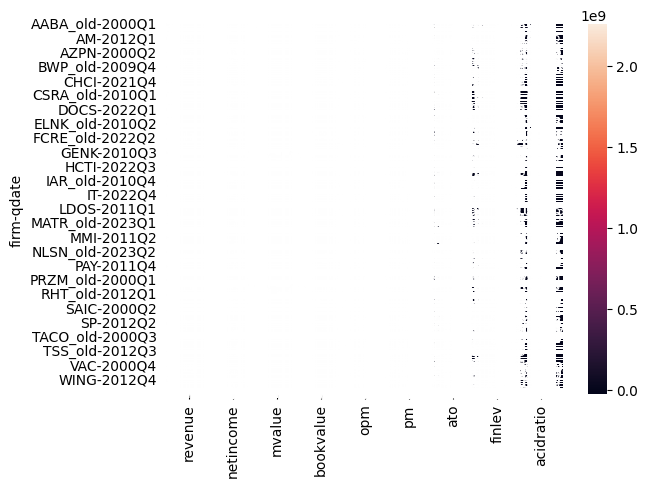

In [31]:
# Calculo la matriz de correlaciones
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = dataser[['revenue', 'netincome', 'mvalue', 'bookvalue', 'opm', 'pm', 'ato', 'finlev', 'acidratio']]
sn.heatmap(corr_matrix, annot=True)
plt.show()